# **Movie Data Exploratory Data Analysis (EDA)**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
movies_df = pd.read_csv("Clean_movie_data.csv")

In [22]:
movies_df.head()

,MovieTitle,ReleaseYear,RunTime,Genres,DirectorName,Rating,Studio,OriginCountry,OriginalLanguage,cast
0,1917,2019,119.0,"War, History, Thriller",Sam Mendes,4.11,DreamWorks Pictures,India,English,"George MacKay, Dean-Charles Chapman, Mark Stro..."
1,Life of Pi,2012,127.0,"Drama, Adventure",Ang Lee,3.74,Fox 2000 Pictures,India,English,"Suraj Sharma, Irrfan Khan, Ayush Tandon, Gauta..."
2,RRR,2022,185.0,"Adventure, Action, Drama",S. S. Rajamouli,4.20,DVV Entertainment,India,Telugu,"N.T. Rama Rao Jr., Ram Charan, Olivia Morris, ..."
3,Pixels,2015,106.0,"Science Fiction, Action, Fantasy, Comedy",Chris Columbus,2.33,Columbia Pictures,China,English,"Adam Sandler, Kevin James, Michelle Monaghan, ..."
4,Lincoln,2012,149.0,"History, Drama",Steven Spielberg,3.58,DreamWorks Pictures,India,English,"Daniel Day-Lewis, Sally Field, David Strathair..."


In [23]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MovieTitle        710 non-null    object 
 1   ReleaseYear       710 non-null    int64  
 2   RunTime           710 non-null    float64
 3   Genres            710 non-null    object 
 4   DirectorName      710 non-null    object 
 5   Rating            710 non-null    float64
 6   Studio            710 non-null    object 
 7   OriginCountry     710 non-null    object 
 8   OriginalLanguage  710 non-null    object 
 9   cast              710 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 55.6+ KB


### **EDA Functions**

In [25]:
def basic_info(df):
    print("Shape:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nInfo:")
    print(df.info())
    print("\nMissing values:\n", df.isnull().sum())

def show_head(df, n=5):
    display(df.head(n))

def describe_numeric(df):
    display(df.describe())

def describe_object(df):
    display(df.describe(include='object'))

def plot_hist(df, column, bins=20):
    plt.figure(figsize=(8,4))
    sns.histplot(df[column].dropna(), bins=bins, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

def plot_count(df, column, top_n=10):
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[column], order=df[column].value_counts().index[:top_n])
    plt.title(f'Top {top_n} {column}')
    plt.show()

def plot_box(df, column):
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

def plot_correlation(df):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

In [27]:
basic_info(movies_df)

Shape: (710, 10)

Columns: ['MovieTitle', 'ReleaseYear', 'RunTime', 'Genres', 'DirectorName', 'Rating', 'Studio', 'OriginCountry', 'OriginalLanguage', 'cast']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MovieTitle        710 non-null    object 
 1   ReleaseYear       710 non-null    int64  
 2   RunTime           710 non-null    float64
 3   Genres            710 non-null    object 
 4   DirectorName      710 non-null    object 
 5   Rating            710 non-null    float64
 6   Studio            710 non-null    object 
 7   OriginCountry     710 non-null    object 
 8   OriginalLanguage  710 non-null    object 
 9   cast              710 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 55.6+ KB
None

Missing values:
 MovieTitle          0
ReleaseYear         0
RunTime             0
Genres       

In [29]:
describe_numeric(movies_df)

,ReleaseYear,RunTime,Rating
count,710.000000,710.000000,710.000000
mean,2014.263380,142.105634,3.385423
std,13.001885,27.113487,0.513861
min,1951.000000,23.000000,1.420000
25%,2011.000000,125.000000,3.100000
50%,2018.000000,143.000000,3.490000
75%,2023.000000,160.000000,3.780000
max,2025.000000,315.000000,4.360000


In [30]:
describe_object(movies_df)

,MovieTitle,Genres,DirectorName,Studio,OriginCountry,OriginalLanguage,cast
count,710,710,710,710,710,710,710
unique,705,291,415,354,17,12,710
top,Don,Drama,Mani Ratnam,Yash Raj Films,India,Hindi,"George MacKay, Dean-Charles Chapman, Mark Stro..."
freq,2,53,15,28,664,318,1


In [28]:
show_head(movies_df)

,MovieTitle,ReleaseYear,RunTime,Genres,DirectorName,Rating,Studio,OriginCountry,OriginalLanguage,cast
0,1917,2019,119.0,"War, History, Thriller",Sam Mendes,4.11,DreamWorks Pictures,India,English,"George MacKay, Dean-Charles Chapman, Mark Stro..."
1,Life of Pi,2012,127.0,"Drama, Adventure",Ang Lee,3.74,Fox 2000 Pictures,India,English,"Suraj Sharma, Irrfan Khan, Ayush Tandon, Gauta..."
2,RRR,2022,185.0,"Adventure, Action, Drama",S. S. Rajamouli,4.20,DVV Entertainment,India,Telugu,"N.T. Rama Rao Jr., Ram Charan, Olivia Morris, ..."
3,Pixels,2015,106.0,"Science Fiction, Action, Fantasy, Comedy",Chris Columbus,2.33,Columbia Pictures,China,English,"Adam Sandler, Kevin James, Michelle Monaghan, ..."
4,Lincoln,2012,149.0,"History, Drama",Steven Spielberg,3.58,DreamWorks Pictures,India,English,"Daniel Day-Lewis, Sally Field, David Strathair..."


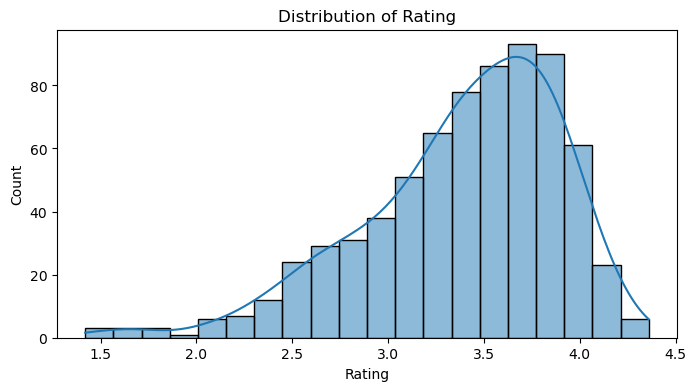

In [31]:
plot_hist(movies_df, 'Rating')

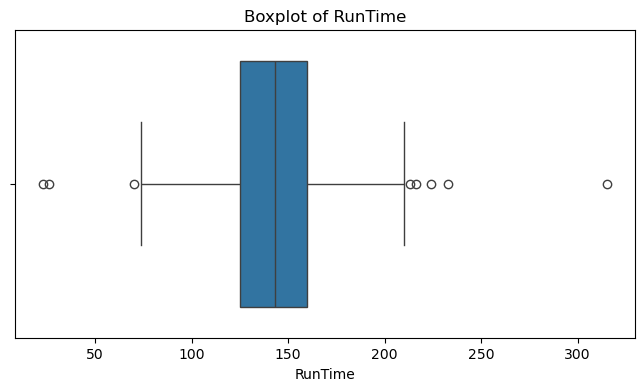

In [32]:
plot_box(movies_df, 'RunTime')

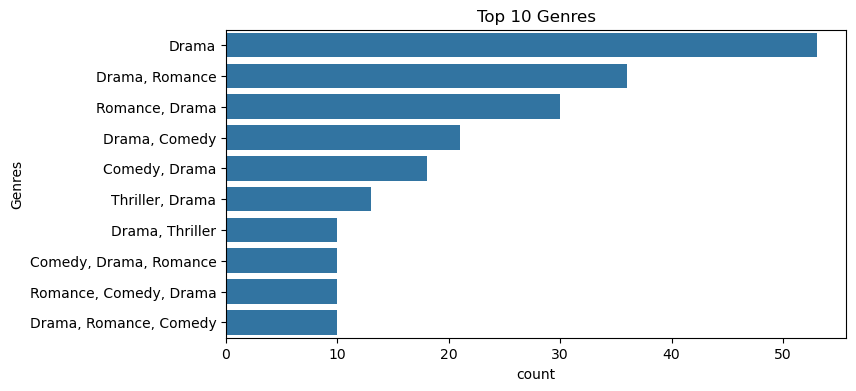

In [33]:
plot_count(movies_df, 'Genres')

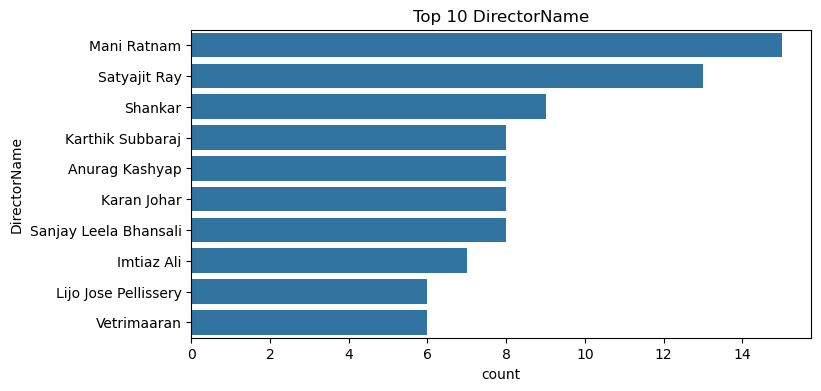

In [34]:
plot_count(movies_df, 'DirectorName')

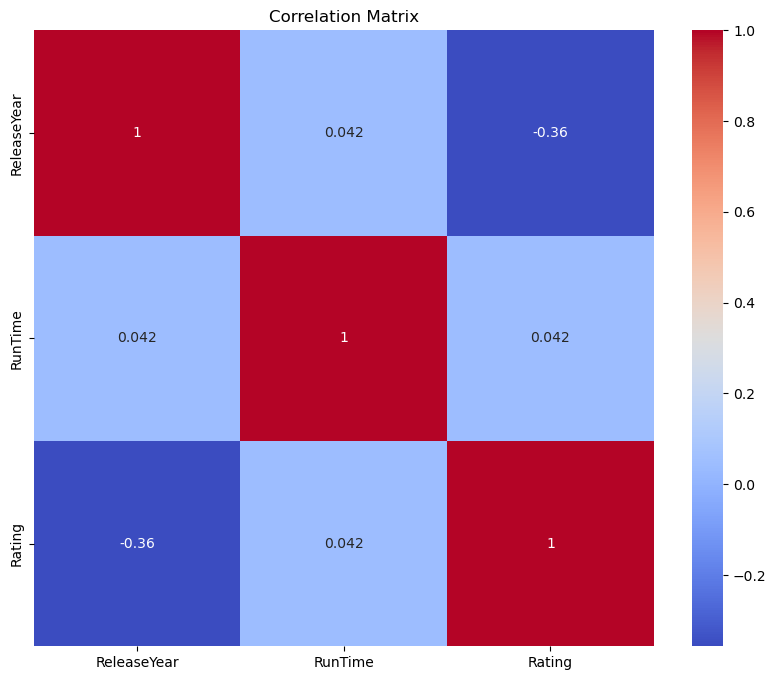

In [35]:
plot_correlation(movies_df)